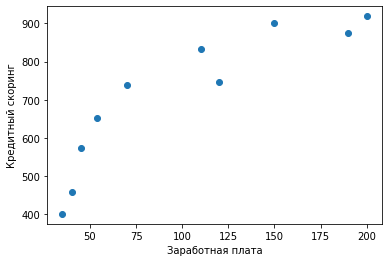

Из графика  можно предположить о наличии некоей линейной взаимосвязи между зависимой и независимой переменными
Коэффициенты линейной регрессии равны: 2.620538882402765 и 444.1773573243596


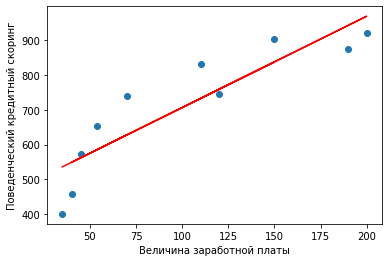

С intercept
ks=
[[401]
 [574]
 [874]
 [919]
 [459]
 [739]
 [653]
 [902]
 [746]
 [832]]
zp=
[[  1.  35.]
 [  1.  45.]
 [  1. 190.]
 [  1. 200.]
 [  1.  40.]
 [  1.  70.]
 [  1.  54.]
 [  1. 150.]
 [  1. 120.]
 [  1. 110.]]
B = [[444.17735732]
 [  2.62053888]]
Без intercept
ks=
[[401]
 [574]
 [874]
 [919]
 [459]
 [739]
 [653]
 [902]
 [746]
 [832]]
zp=
[[ 35]
 [ 45]
 [190]
 [200]
 [ 40]
 [ 70]
 [ 54]
 [150]
 [120]
 [110]]
B = [[5.88982042]]


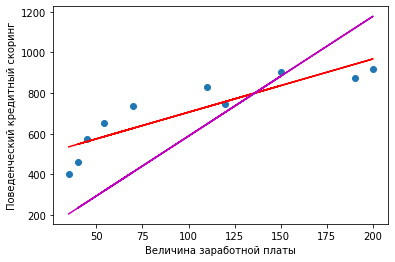

In [31]:
# Задача 1.Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
# zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
# ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
# Используя математические операции, посчитать коэффициенты линейной регрессии, 
#приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).
# Произвести расчет как с использованием intercept, так и без.

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
# Построим график, чтобы определить есть ли зависимость между величиной заработной платы и поведенческого кредитного скоринга
plt.scatter(zp,ks)
plt.xlabel('Заработная плата')
plt.ylabel('Кредитный скоринг', rotation=90)
plt.show()
print ('Из графика  можно предположить о наличии некоей линейной взаимосвязи между зависимой и независимой переменными')
# Взаимосвязь между зависимой и независимой переменной можно описать в виде функции y=a+bx
# Найдём коэффициенты линейной регрессии
b=(np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
a=np.mean(ks)-b*np.mean(zp)
print ('Коэффициенты линейной регрессии равны:',b, 'и', a)
# Построим полученную функцию:
plt.scatter(zp,ks)
plt.plot(zp, 444.18+2.62*zp, c='r')

plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

# Найдём коэффициенты линейной регрессии с помощью матричного метода:
# с использованием intercept
print ('С intercept')
ks = ks.reshape(-1,1)
print ('ks=')
print (ks) 
zp=zp.reshape((-1,1))
zp=np.hstack([np.ones((len(zp),1)),zp])
print ('zp=') 
print (zp) 
# Проведем рассчет:
B=np.dot(np.linalg.inv(np.dot(zp.T,zp)),np.dot(zp.T,ks))
print('B =', B)
# Без intercept, y=bx
print ('Без intercept')
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
ks=ks.reshape((-1,1))
print ('ks=')
print (ks)
zp=zp.reshape((-1,1))
print ('zp=') 
print (zp)
B=np.dot(np.linalg.inv(np.dot(zp.T,zp)),np.dot(zp.T,ks))
print('B =', B)
# Построим график:
plt.scatter(zp,ks)
plt.plot(zp, 444.18+2.62*zp, c='r')
plt.plot(zp, B*zp, c='m')
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()


In [52]:
# Задача2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
def _mse(b, x, y):
    return np.sum((b*x-y)**2)/len(x)
# Посчитаем для b=2.62
print(_mse(2.62, zp, ks))
print ('Вычислим')
def _mse_p(b,x,y):
    return (2/len(x))*np.sum((b*x-y)*x)
alpha=1e-06
b=0.1
mse_m=_mse(b,zp,ks)
i_m=1
b_m=b
for i in range(10000):
    b-=alpha*_mse_p(b,zp,ks)
    if i%100==0:
        print(f'Итерация #{i}, b={b}, mse={_mse(b, zp,ks)}')
    if _mse(b,zp,ks)>mse_m:
        print(f'Итерация #{i_m}, b={b_m}, mse={mse_m}\n')
        break
    else:
        mse_m=_mse(b,zp,ks)
        i_m=i
        b_m=b
print ('Koэффициент равен',b_m)
  

203812.48504
Вычислим
Итерация #0, b=0.25952808000000005, mse=493237.7212546963
Итерация #100, b=5.54537842245223, mse=58151.31823171113
Итерация #200, b=5.868748638669329, mse=56522.97550129376
Итерация #300, b=5.888531320728348, mse=56516.88130936019
Итерация #400, b=5.8897415574471985, mse=56516.85850140053
Итерация #500, b=5.889815595583751, mse=56516.858416040064
Итерация #600, b=5.889820124983314, mse=56516.85841572062
Итерация #628, b=5.889820285147628, mse=56516.85841571966

Koэффициент равен 5.889820285147628


Итерация #0, a=0.169966, b=8.07468054476, mse=122318.06397097567
Итерация #50000, a=319.27767648420047, b=3.5398324356503275, mse=10427.569111705801
Итерация #100000, a=409.0442373734796, b=2.879127619051743, mse=6783.521961452364
Итерация #150000, a=434.29473705519484, b=2.693277491833349, mse=6495.188684804794
Итерация #200000, a=441.3974680483413, b=2.6409995775222037, mse=6472.374468908443
Итерация #250000, a=443.39540029510493, b=2.62629428586797, mse=6470.569306309746
Итерация #300000, a=443.95740007610897, b=2.622157823932053, mse=6470.426473787141
Итерация #350000, a=444.1154853937451, b=2.6209942756156086, mse=6470.415172240385
Итерация #400000, a=444.159953325044, b=2.6206669802831115, mse=6470.414278011555
Итерация #450000, a=444.1724617410292, b=2.6205749151465225, mse=6470.414207256183
Итерация #500000, a=444.1759802422447, b=2.6205490180788695, mse=6470.414201657699
Итерация #520164, a=444.17653163778414, b=2.62054495966686, mse=6470.414201349592,

a=444.17653163778414
b=

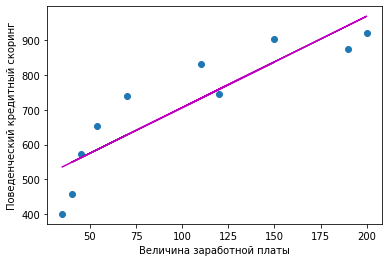

In [58]:
# Задача 3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно 
# (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
# Функция:
def _mse_ab(a,b, x, y):
    return np.sum(((a+b*x)-y)**2)/len(x)
# Найдем по a
def _mse_pa(a,b,x,y): 
    return 2*np.sum((a+b*x)-y)/len(x)
# Найдем по b
def _mse_pb(a,b,x,y):
    return 2*np.sum(((a+b*x)-y)*x)/len(x)
alpha=5e-05
b=0.1
a=0.1
mseab_m=_mse_ab(a,b,zp,ks)
i_m=1
b_m=b
a_m=a
   
for i in range(1000000):
    a-=alpha*_mse_pa(a,b,zp,ks)
    b-=alpha*_mse_pb(a,b,zp,ks)
    if i%50000==0:
        print(f'Итерация #{i}, a={a}, b={b}, mse={_mse_ab(a, b, zp,ks)}')
    if _mse_ab(a, b,zp,ks)>mseab_m:
        print(f'Итерация #{i_m}, a={a_m}, b={b_m}, mse={mseab_m},\n')
        break
    else:
        mseab_m=_mse_ab(a, b,zp,ks)
        i_m=i
        b_m=b
        a_m=a
print(f'a={a_m}\nb={b_m}')  
# Построим график
plt.scatter(zp,ks)
plt.plot(zp,a_m+b_m*zp, c='m')
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()
